In [5]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [13]:
## Feature Engineering
geography=pd.get_dummies(dataset['Geography'],drop_first=True).astype(int)
gender=pd.get_dummies(dataset['Gender'],drop_first=True).astype(int)

In [14]:
## concatenate these variables with dataframe
if 'Geography' in X.columns and 'Gender' in X.columns:
    X = X.drop(['Geography','Gender'],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
X = pd.concat([X,geography,gender],axis=1)
display(X.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
X_train.shape

(8000, 11)

In [23]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
## lets initialize the ANN

classifier=Sequential()

In [25]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [46]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [47]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [48]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [49]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [52]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7896 - loss: 0.5869 - val_accuracy: 0.7955 - val_loss: 0.4063
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8404 - loss: 0.3975 - val_accuracy: 0.8417 - val_loss: 0.3827
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.3770 - val_accuracy: 0.8379 - val_loss: 0.3798
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8524 - loss: 0.3636 - val_accuracy: 0.8512 - val_loss: 0.3772
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8625 - loss: 0.3411 - val_accuracy: 0.8501 - val_loss: 0.3767
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.3646 - val_accuracy: 0.8489 - val_loss: 0.3787
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8604 - loss: 0.3464 - val_accuracy: 0.8478 - val_loss: 0.3793
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8627 - loss: 0.3498 - 

In [54]:
## Early Stopping--stop training when a monitored  metric has stopped improving
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [55]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

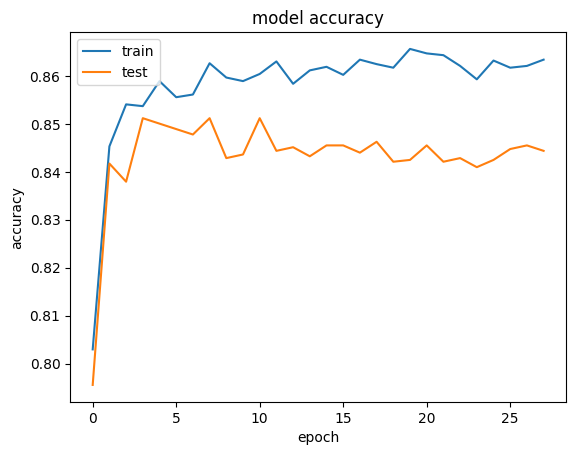

In [56]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

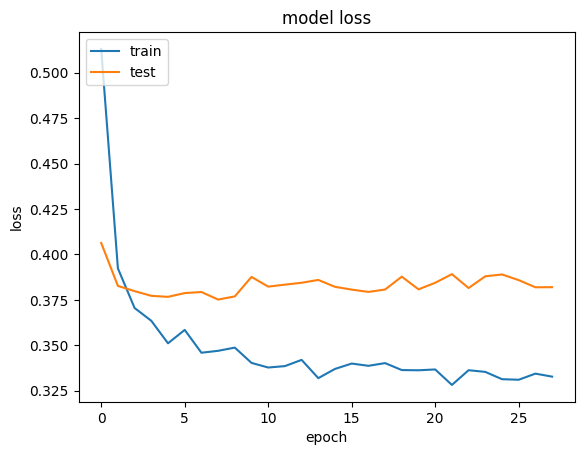

In [57]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [58]:
#Part3 - Making the predictions and evaluating the model
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [59]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1557,   38],
       [ 248,  157]])

In [61]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.857

In [62]:
#get the weights
classifier.get_weights()

[array([[ 1.37869373e-01, -3.29521686e-01,  9.00845975e-02,
          3.75560731e-01,  7.81052560e-02, -2.94878855e-02,
          3.91141176e-01, -2.48814952e-02,  5.77216819e-02,
         -2.58029819e-01, -5.94574511e-01],
        [-5.92607439e-01,  6.15834892e-01,  8.65909100e-01,
         -4.18431640e-01, -6.42442226e-01,  5.31634033e-01,
         -6.29013658e-01,  8.41750383e-01,  4.37155724e-01,
          1.02045529e-01, -2.13940125e-02],
        [-3.68243575e-01,  1.13135166e-01,  1.79211125e-01,
          3.22583802e-02,  1.99847385e-01,  4.99360971e-02,
          3.09574306e-01,  3.40259857e-02, -3.45004618e-01,
         -5.42603612e-01,  9.72568542e-02],
        [ 7.17639208e-01,  1.12275171e+00,  4.22410756e-01,
         -3.63210052e-01,  3.07450354e-01, -5.01983941e-01,
         -1.11871505e+00, -1.24778405e-01, -6.65776551e-01,
          2.91712672e-01,  1.03230864e-01],
        [ 8.45784485e-01, -1.00681961e+00,  4.72682148e-01,
         -5.20245016e-01, -1.05855074e-02, -